In [17]:
import numpy as np
from skimage.filters import gaussian
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
a = np.array(Image.open("sample_image.jpg"))

In [29]:
a.shape

(893, 720, 3)

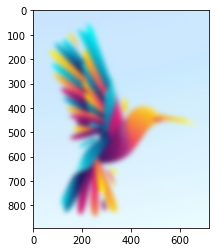

In [27]:
plt.imshow(gaussian(a, 10, channel_axis = 2))

In [28]:
!pip install troch

ModuleNotFoundError: No module named 'torch'

In [9]:
a, b = np.array([False]), np.array([True])

In [10]:
np.bitwise_xor(a, b)

array([ True])